## 1. Entendimiento del problema
Datos de cancer de mama. Se tienen 4024 pacientes entre 2006 y 2020. Se cuenta con los datos de evolucion y lasituacion final (Sobrevive o no sobreviva)

## 2.Enfoque analitico
Desarrollar un mdeolo de clasificacion del estusnde supervivecia de un apaciente con una curracy superior al 80%

## 3.Requerimeinto de datos
- Se hace necesario informacion demografica de los pacientes
- Necesario inf de evolucion de la enfermedad
- necesario status de los pacientes


## 4.Recoleccion de datos
- Datos demograficos: edad, raza, estado civil
- Datos evolucion enfermedad: Phases (T stage,N stage, 6th stage), Diferenciacion de los ganglios, estado de la enfermedad, tamaño del tumor, estado de dispersion, estados de pronesterona y estrogeno, nodos revisados, nodos comprometidos, meses actuales de supervicencia (Cantidad de meses desde el descrubirimiento hasta muerte o finalizacion)
- Estado de supervivencia: Alive, Death

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [4]:
data= pd.read_csv('datos_medicina.csv')

## 5.Entendimiento de los datos
- Datos nulos
- Univariada
- Multivariada
- Bivariada


In [5]:
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
data.head()

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [8]:
data.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

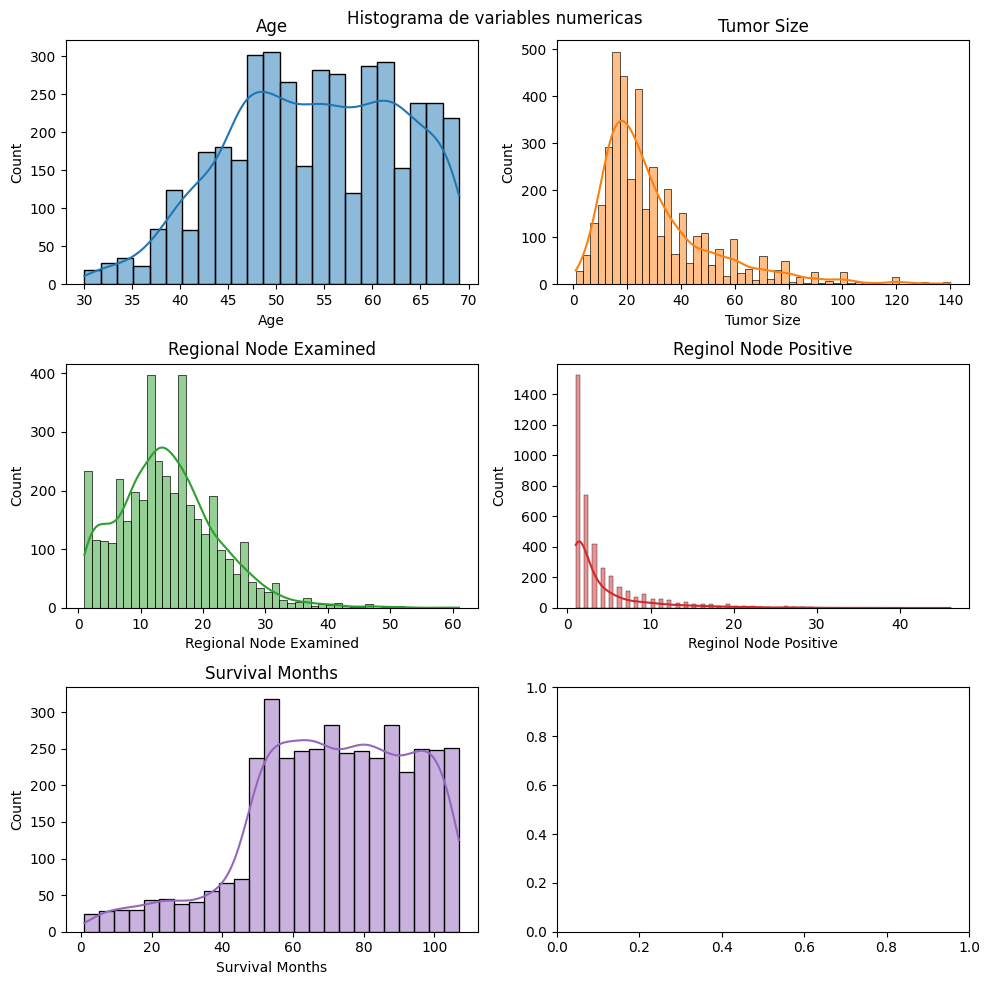

In [9]:
## Estadistica univariada
## Histograma de frecuenteia de varibales numericas
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax = ax.flat
num_col= data.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data=data, kde=True,x=col,color=(list(plt.rcParams['axes.prop_cycle'])*7)[i]['color'], ax=ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histograma de variables numericas')
plt.show()


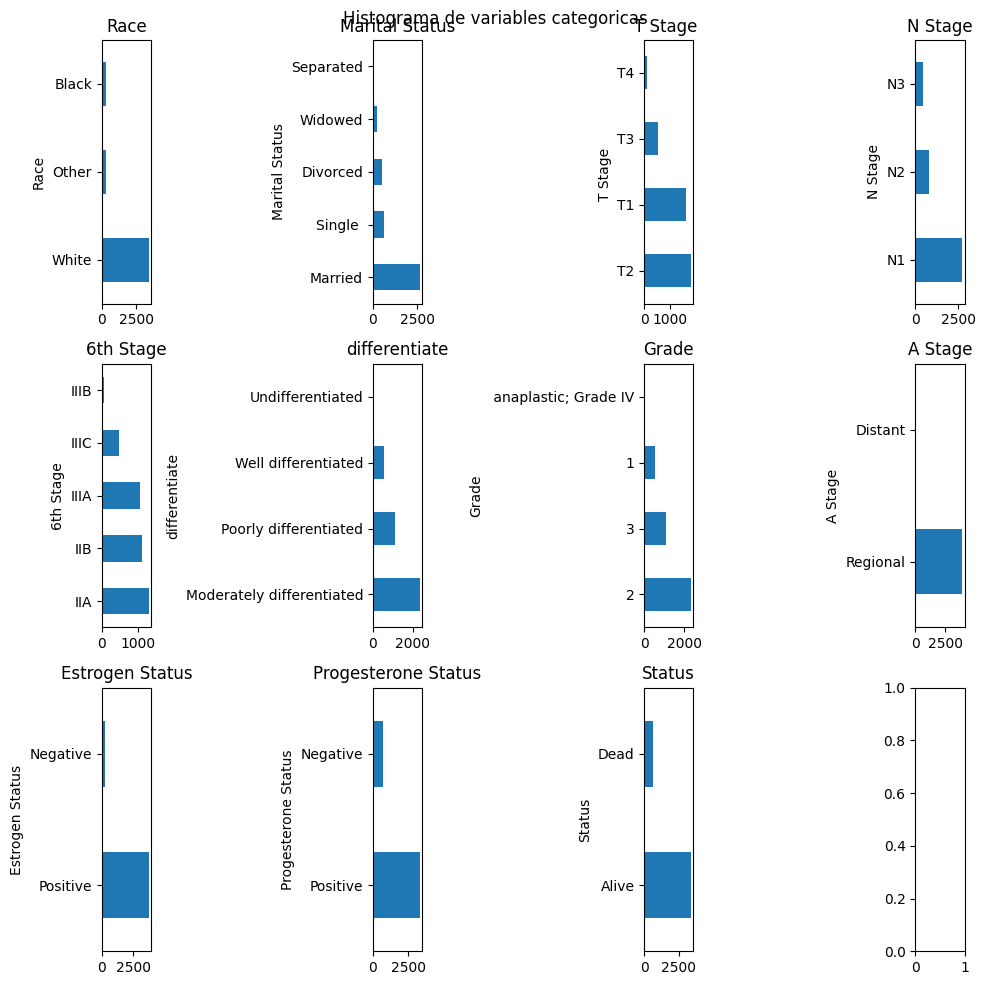

In [10]:
## Estadistica univariada
## Histograma de frecuenteia de varibales categoricas
fig, ax = plt.subplots(3, 4, figsize=(10,10))
ax = ax.flat
cat_data= data.select_dtypes(include=['object']).columns
for i, col in enumerate(cat_data):
    data[col].value_counts().plot.barh(ax=ax[i])
    ax[i].set_title(col)

fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Histograma de variables categoricas')
plt.show()


([<matplotlib.patches.Wedge at 0x7884626cd7c0>,
 [Text(-0.9752268086281166, 0.5088542735725221, 'Alive'),
  Text(0.975226853113568, -0.5088541883154815, 'Dead')],
 [Text(-0.5319418956153362, 0.27755687649410293, '84.7%'),
  Text(0.531941919880128, -0.27755682999026254, '15.3%')])

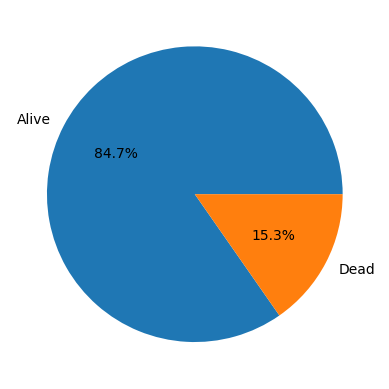

In [11]:
plt.pie(x=data.Status.value_counts(), labels=data.Status.value_counts().index, autopct='%1.1f%%')

## Solo aumentalos la Y

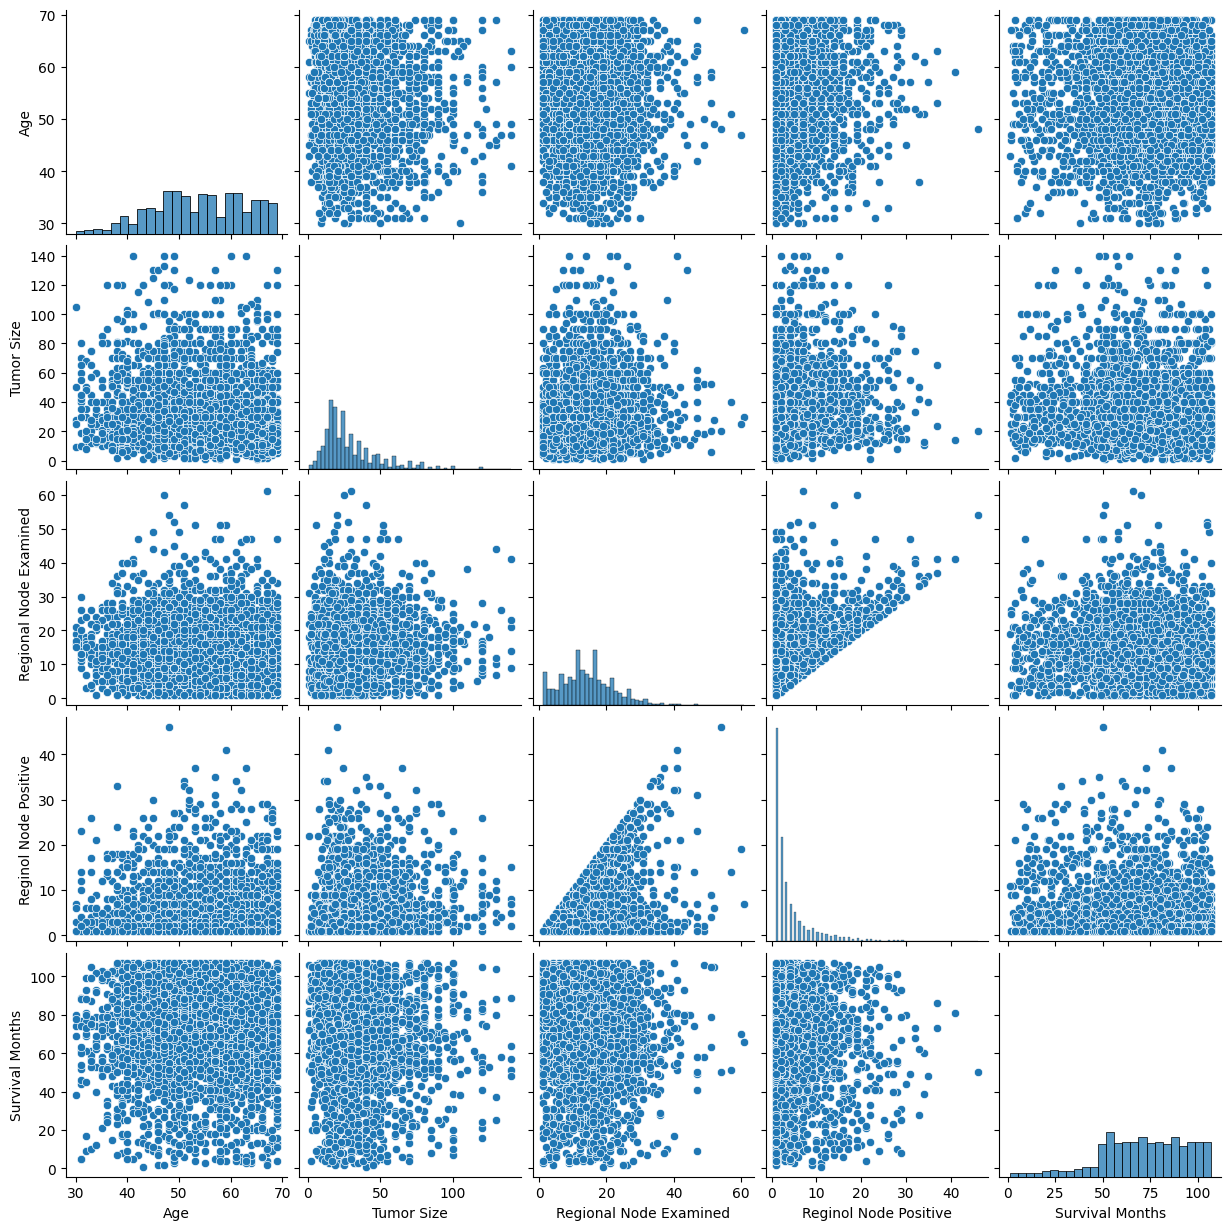

In [12]:
## estadistica 
sb.pairplot(data=data)
plt.show()

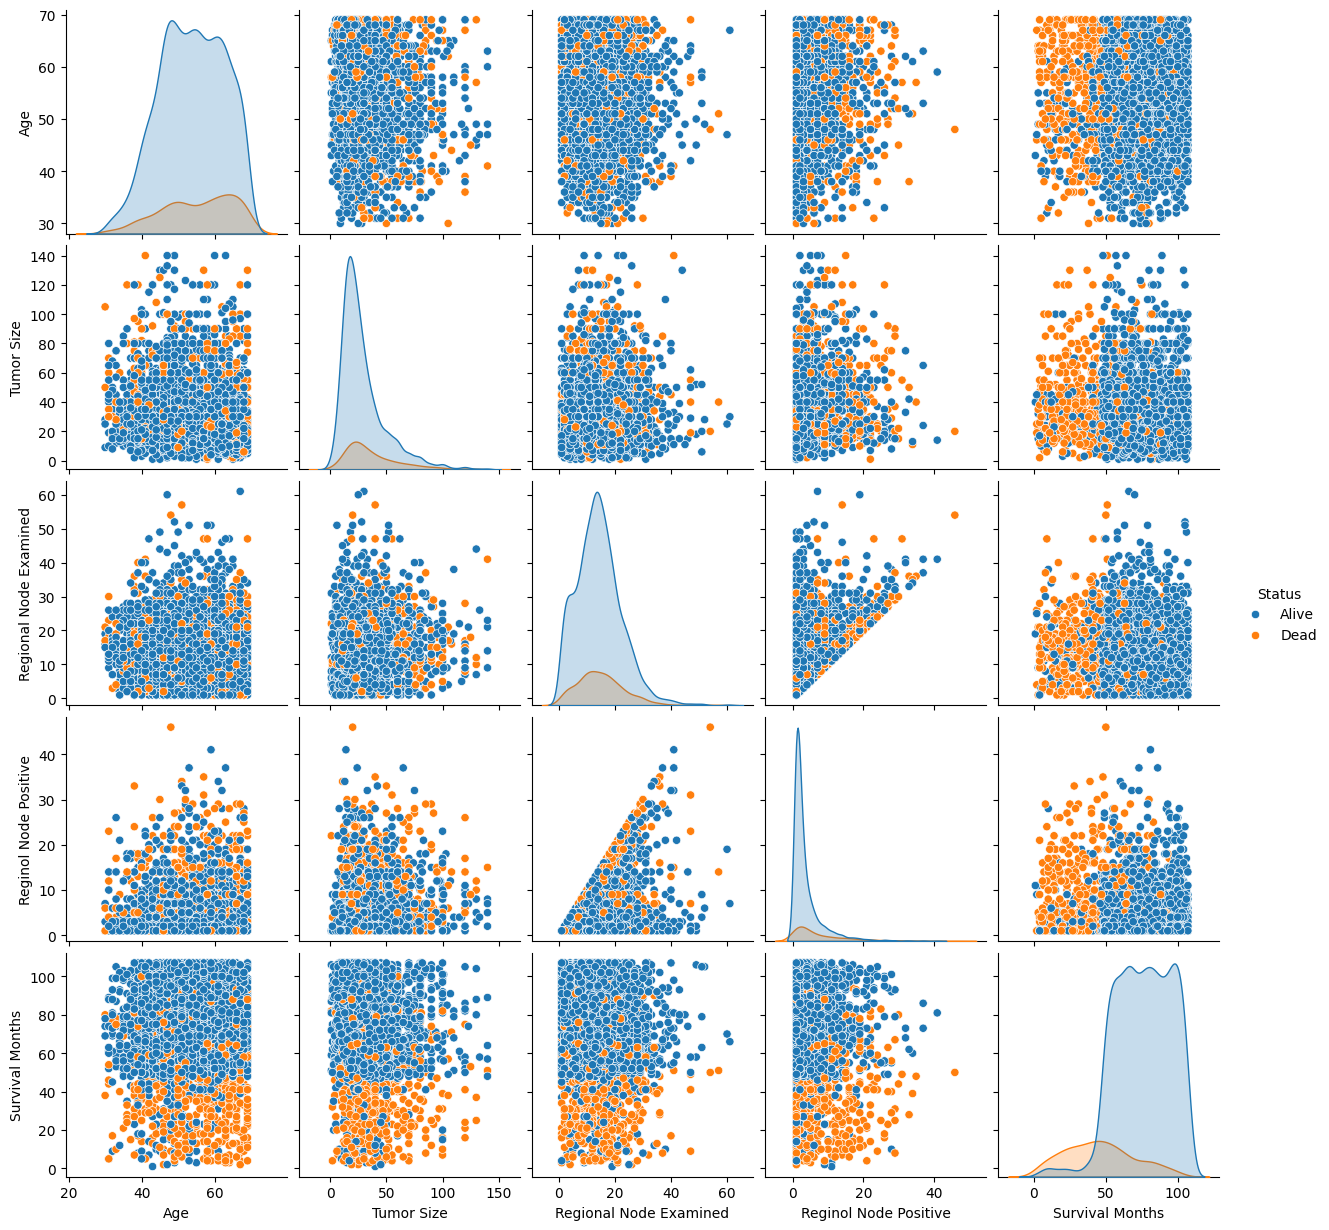

In [13]:
sb.pairplot(data=data, hue='Status')

## Survival months se vuelve una varaible importante por que clasifica a los pacientes en dos grupos, pero no lo hace solo, necesiata de varias varaibles.

<Axes: >

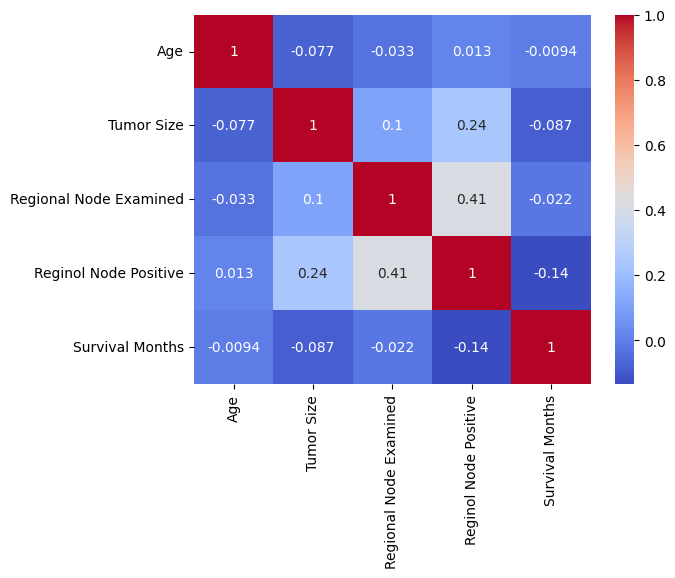

In [14]:
## estadistica multivariable
sb.heatmap(data=data.corr(numeric_only=True), annot=True, cmap='coolwarm')

## Preparacion de datos
1. Eliminar variables que no aportan para el modelo
2. Balancear la variables Y.
3. Escalar las variables numericas y codificar las variables categoricas
3. Contruir los conjuntos de entrenamiento y validacion de nuestro modelo.

In [15]:
data_mod = data.drop(['A Stage','Estrogen Status','Progesterone Status'], axis=1)    
data_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Regional Node Examined  4024 non-null   int64 
 10  Reginol Node Positive   4024 non-null   int64 
 11  Survival Months         4024 non-null   int64 
 12  Status                  4024 non-null   object
dtypes: int64(5), object(8)
memory usage: 408.8+ KB


In [16]:
## COnstruir un df con los datos Alive y Dead
data_alive = data_mod[data_mod['Status']=='Alive']
data_dead = data_mod[data_mod['Status']=='Dead']
print(data_alive.shape)
print(data_dead.shape)

(3408, 13)
(616, 13)


In [17]:
# data reduction (submuestreo)
data_alive_sub= data_alive.sample(data_dead.shape[0], replace=True)
data_sub=pd.concat([data_alive_sub, data_dead], axis=0)
data_sub=data_sub.reset_index(drop=True)
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     1232 non-null   int64 
 1   Race                    1232 non-null   object
 2   Marital Status          1232 non-null   object
 3   T Stage                 1232 non-null   object
 4   N Stage                 1232 non-null   object
 5   6th Stage               1232 non-null   object
 6   differentiate           1232 non-null   object
 7   Grade                   1232 non-null   object
 8   Tumor Size              1232 non-null   int64 
 9   Regional Node Examined  1232 non-null   int64 
 10  Reginol Node Positive   1232 non-null   int64 
 11  Survival Months         1232 non-null   int64 
 12  Status                  1232 non-null   object
dtypes: int64(5), object(8)
memory usage: 125.3+ KB


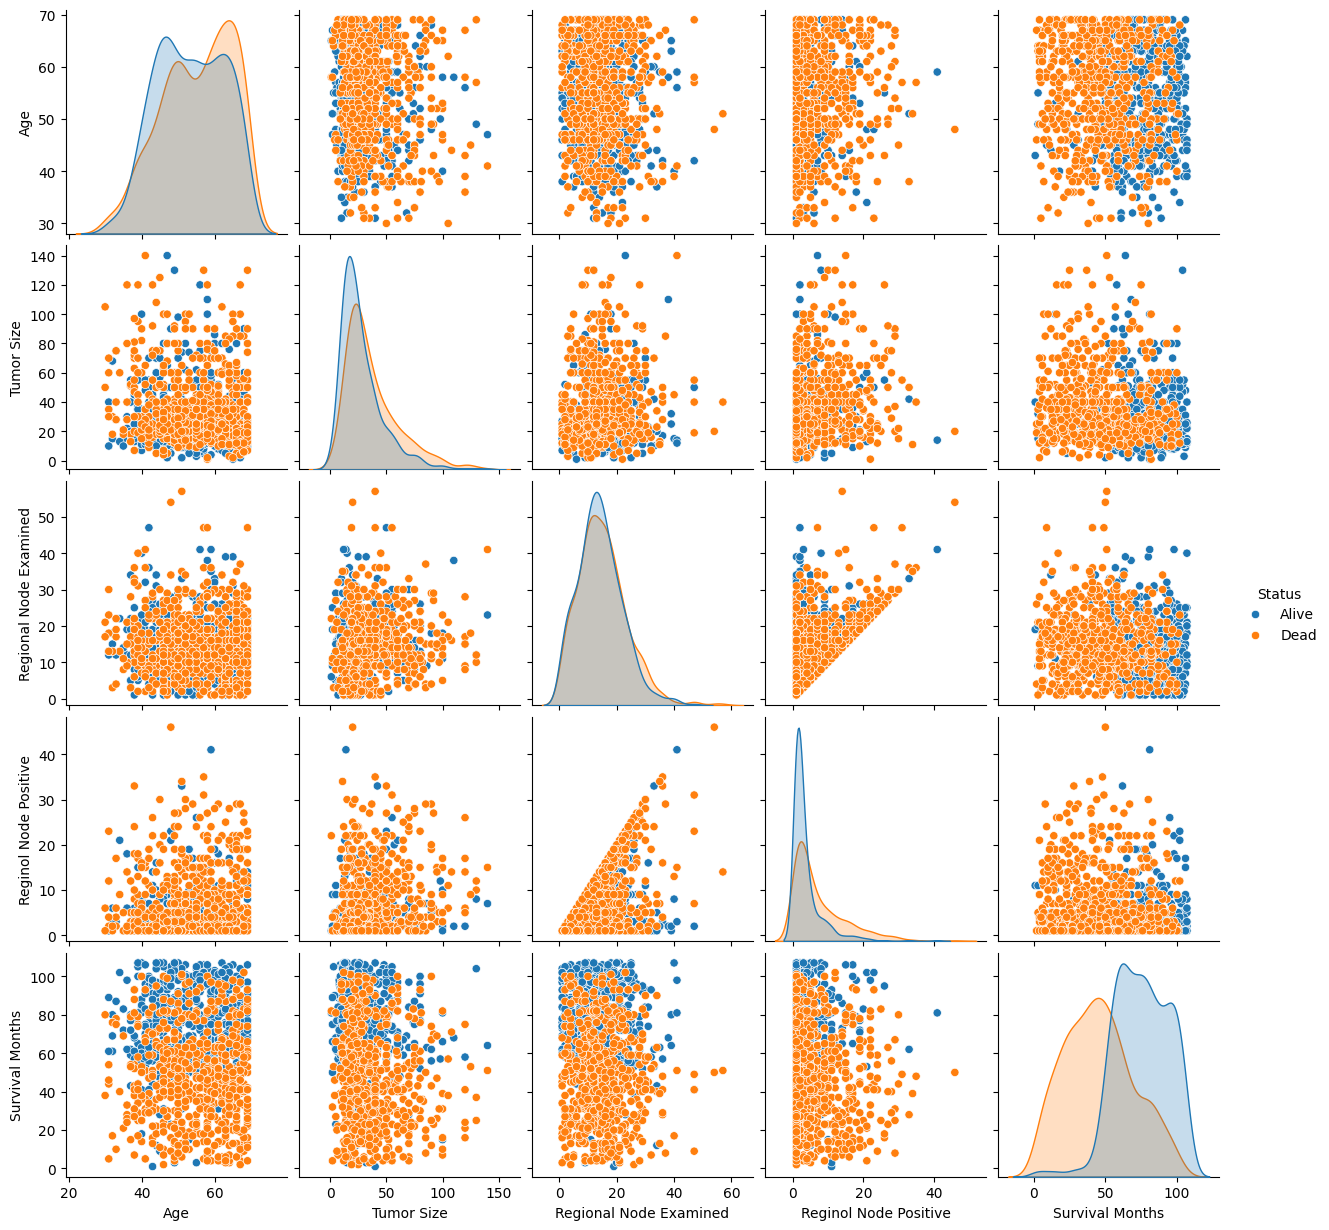

In [18]:
sb.pairplot(data=data_sub, hue='Status')

In [19]:
# data augmentation (Remuestreo)
data_dead_re= data_dead.sample(data_alive.shape[0], replace=True)
data_re=pd.concat([data_alive, data_dead_re], axis=0)
data_re=data_re.reset_index(drop=True)
data_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6816 entries, 0 to 6815
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     6816 non-null   int64 
 1   Race                    6816 non-null   object
 2   Marital Status          6816 non-null   object
 3   T Stage                 6816 non-null   object
 4   N Stage                 6816 non-null   object
 5   6th Stage               6816 non-null   object
 6   differentiate           6816 non-null   object
 7   Grade                   6816 non-null   object
 8   Tumor Size              6816 non-null   int64 
 9   Regional Node Examined  6816 non-null   int64 
 10  Reginol Node Positive   6816 non-null   int64 
 11  Survival Months         6816 non-null   int64 
 12  Status                  6816 non-null   object
dtypes: int64(5), object(8)
memory usage: 692.4+ KB


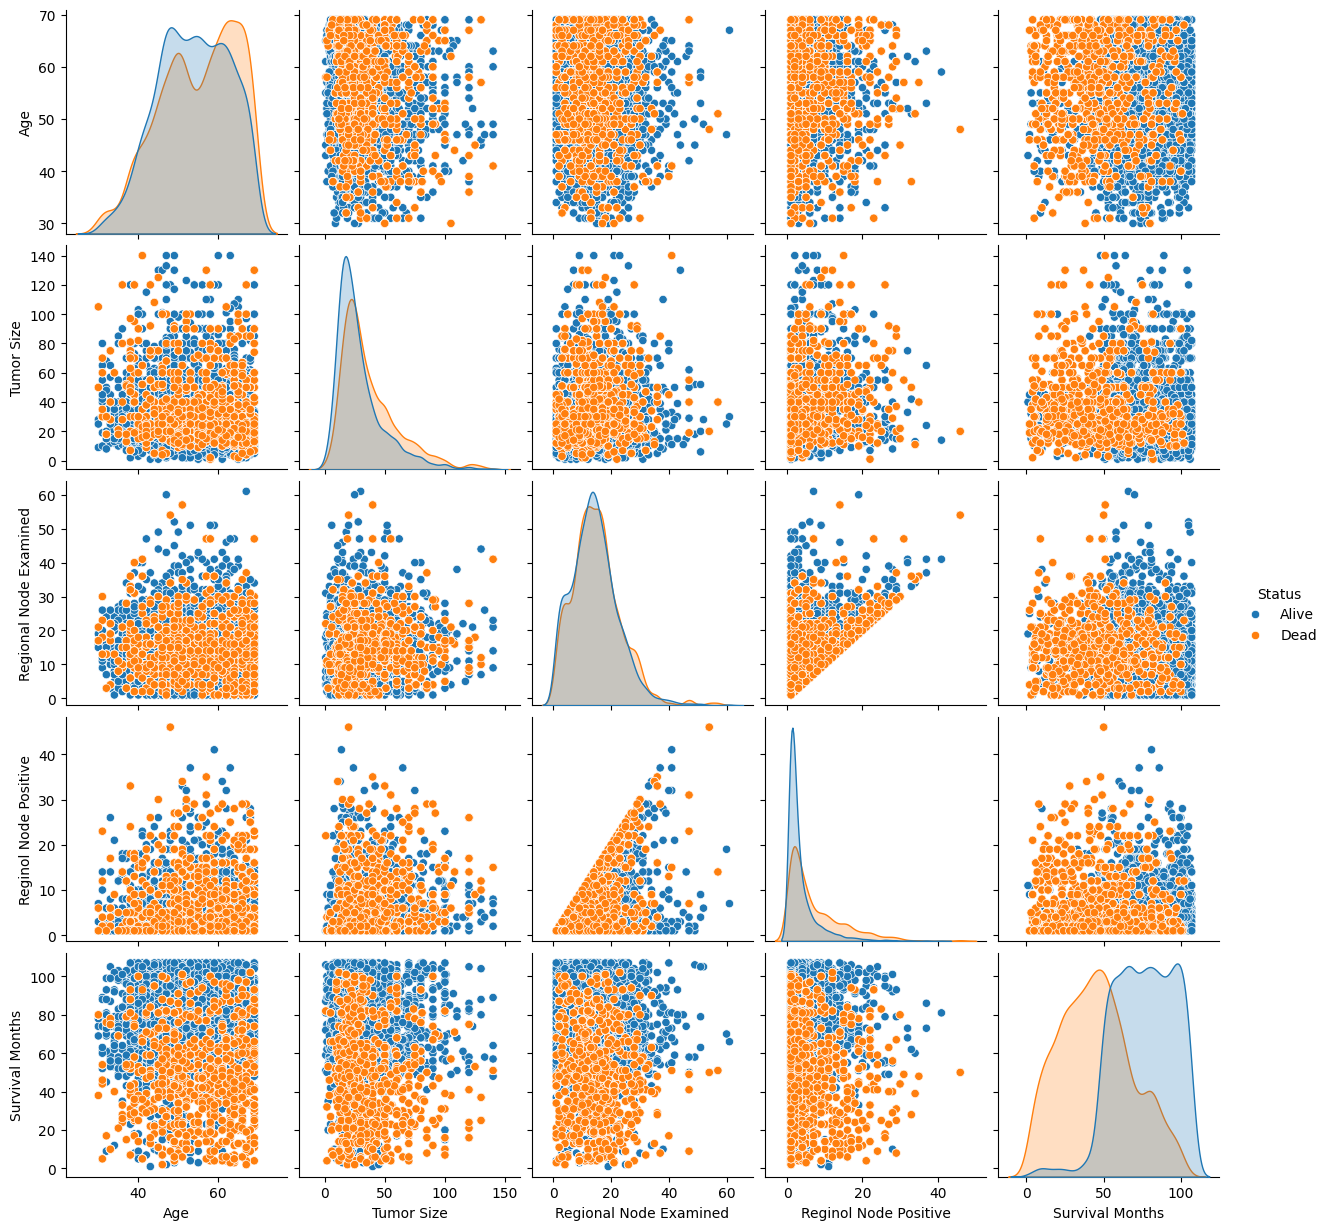

In [20]:
sb.pairplot(data=data_re, hue='Status')

([<matplotlib.patches.Wedge at 0x7884600ab1a0>,
 [Text(-4.8082529002048655e-08, 1.099999999999999, 'Alive'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'Dead')],
 [Text(-2.6226834001117445e-08, 0.5999999999999994, '50.0%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.0%')])

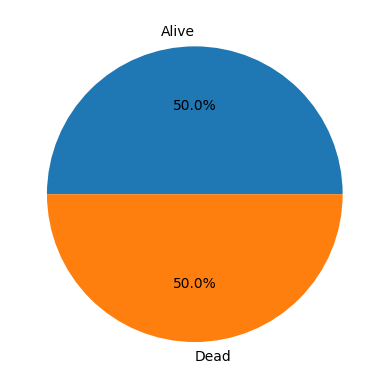

In [21]:
plt.pie(x=data_re.Status.value_counts(), labels=data_re.Status.value_counts().index, autopct='%1.1f%%')

## Solo aumentalos la Y

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline

In [23]:
X=data_re.drop(['Status'], axis=1)
y=data_re['Status']
num_col=X.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_col=X.select_dtypes(include=['object']).columns.to_list()

num_transformer= Pipeline(steps=[('scaler', MinMaxScaler())])
cat_transformer= Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor= ColumnTransformer(transformers=[('num', num_transformer, num_col),
                                            ('cat', cat_transformer, cat_col)],
                                            remainder='passthrough')
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Tumor Size', 'Regional Node Examined',
                                  'Reginol Node Positive', 'Survival Months']),
                                ('cat',
                                 Pipeline(steps=[('encoder', OneHotEncoder())]),
                                 ['Race', 'Marital Status', 'T Stage ',
                                  'N Stage', '6th Stage', 'differentiate',
                                  'Grade'])])

In [24]:
X_pre= preprocessor.fit_transform(X)
cod_cat= preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_col)
labels= np.concatenate([num_col, cod_cat])
X_pro= pd.DataFrame(X_pre, columns=labels)
X_pro.head()


Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0  0.974359    0.021583                0.383333               0.000000   
1  0.512821    0.244604                0.216667               0.088889   
2  0.717949    0.446043                0.216667               0.133333   
3  0.717949    0.122302                0.016667               0.000000   
4  0.435897    0.287770                0.033333               0.000000   

   Survival Months  Race_Black  Race_Other  Race_White  \
0         0.556604         0.0         0.0         1.0   
1         0.575472         0.0         0.0         1.0   
2         0.698113         0.0         0.0         1.0   
3         0.783019         0.0         0.0         1.0   
4         0.462264         0.0         0.0         1.0   

   Marital Status_Divorced  Marital Status_Married  ...  6th Stage_IIIB  \
0                      0.0                     1.0  ...             0.0   
1                      0.0                     1.0  ...             0.0   
2                      1.0                     0.0  ...             0.0   
3                      0.0                     1.0  ...             0.0   
4                      0.0                     1.0  ...             0.0   

   6th Stage_IIIC  differentiate_Moderately differentiated  \
0             0.0                                      0.0   
1             0.0                                      1.0   
2             1.0                                      1.0   
3             0.0                                      0.0   
4             0.0                                      0.0   

   differentiate_Poorly differentiated  differentiate_Undifferentiated  \
0                                  1.0                             0.0   
1                                  0.0                             0.0   
2                                  0.0                             0.0   
3                                  1.0                             0.0   
4                                  1.0                             0.0   

   differentiate_Well differentiated  Grade_ anaplastic; Grade IV  Grade_1  \
0                                0.0                          0.0      0.0   
1                                0.0                          0.0      0.0   
2                                0.0                          0.0      0.0   
3                                0.0                          0.0      0.0   
4                                0.0                          0.0      0.0   

   Grade_2  Grade_3  
0      0.0      1.0  
1      1.0      0.0  
2      1.0      0.0  
3      0.0      1.0  
4      0.0      1.0  

[5 rows x 33 columns]

In [25]:
from sklearn.model_selection import train_test_split
np.random.seed(20)
X_train, X_test, y_train, y_test= train_test_split(X_pro, y, train_size=0.7)
print(X_train.shape)

(4771, 33)


## Modelado y validacion
1. Regresion Logisitica
2. Mquina de soporte v
3. K vecinos
4. Arbol de des
5. Bosque aletorio
6. Adaptative Boosting
7. Gradient boosting
8. Red Nueronal

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
np.random.seed(20)
modelo_1= LogisticRegression(random_state=10)
modelo_1.fit(X_train, y_train)

LogisticRegression(random_state=10)

              precision    recall  f1-score   support

       Alive       0.79      0.80      0.80      2404
        Dead       0.80      0.78      0.79      2367

    accuracy                           0.79      4771
   macro avg       0.79      0.79      0.79      4771
weighted avg       0.79      0.79      0.79      4771



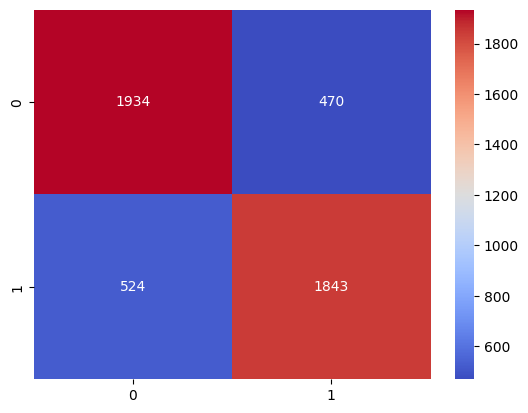

In [28]:
#Obtener las preficciones en entrenamiento
y_pred_train= modelo_1.predict(X_train)
#Reporte de clasificacion
print(classification_report(y_train, y_pred_train))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, cmap='coolwarm', fmt='d')
plt.show()

              precision    recall  f1-score   support

       Alive       0.79      0.83      0.81      1004
        Dead       0.83      0.79      0.81      1041

    accuracy                           0.81      2045
   macro avg       0.81      0.81      0.81      2045
weighted avg       0.81      0.81      0.81      2045



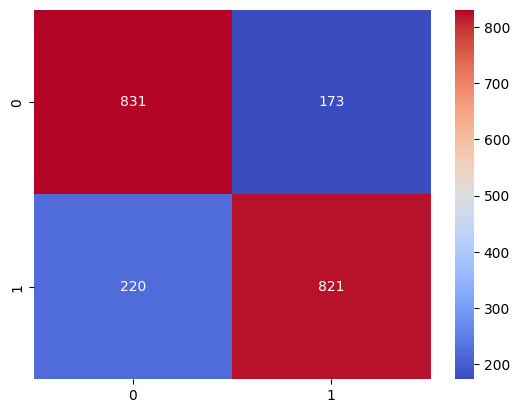

In [29]:
#Obtener las preficciones en validacion
y_pred_test= modelo_1.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

In [30]:
#Busqueda de hiperparametros
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
modelo_1= LogisticRegression(solver='saga', random_state=10)
param_grid= {'C': [0.00001,0.0001,0.01,0.1,1,10,100,1000],
              'penalty': ['l1', 'l2','elasticnet',None]}
#Busqueda exhaustiva
classifier_e= GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5)
classifier_e.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=10, solver='saga'),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None]})

In [31]:
validation=pd.concat([pd.DataFrame(classifier_e.cv_results_["params"]),pd.DataFrame(classifier_e.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

C     penalty  Accuracy
24   100.00000          l1  0.791658
21    10.00000          l2  0.791238
25   100.00000          l2  0.791238
20    10.00000          l1  0.791238
3      0.00001        None  0.791238
7      0.00010        None  0.791238
11     0.01000        None  0.791238
23    10.00000        None  0.791238
27   100.00000        None  0.791238
28  1000.00000          l1  0.791238
29  1000.00000          l2  0.791238
31  1000.00000        None  0.791238
19     1.00000        None  0.791238
15     0.10000        None  0.791238
16     1.00000          l1  0.790819
17     1.00000          l2  0.788933
12     0.10000          l1  0.786627
13     0.10000          l2  0.785581
8      0.01000          l1  0.777823
9      0.01000          l2  0.730458
5      0.00010          l2  0.667787
1      0.00001          l2  0.503878
0      0.00001          l1  0.500735
4      0.00010          l1  0.500735
2      0.00001  elasticnet       NaN
6      0.00010  elasticnet       NaN
10     0.01000  elasticnet       NaN
14     0.10000  elasticnet       NaN
18     1.00000  elasticnet       NaN
22    10.00000  elasticnet       NaN
26   100.00000  elasticnet       NaN
30  1000.00000  elasticnet       NaN

In [32]:
#Aleatorizada
classifier_r= RandomizedSearchCV(estimator=modelo_1, param_distributions=param_grid, cv=5, n_iter=10)
classifier_r.fit(X_train, y_train)

validation=pd.concat([pd.DataFrame(classifier_r.cv_results_["params"]),pd.DataFrame(classifier_r.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

penalty           C  Accuracy
4          l1   100.00000  0.791658
9          l2    10.00000  0.791238
0          l2  1000.00000  0.791238
1        None     1.00000  0.791238
5        None  1000.00000  0.791238
7          l2     0.10000  0.785581
3          l2     0.00001  0.503878
2          l1     0.00010  0.500735
6  elasticnet     0.01000       NaN
8  elasticnet     1.00000       NaN

In [33]:
modelo_1_final= classifier_r.best_estimator_
modelo_1_final


LogisticRegression(C=100, penalty='l1', random_state=10, solver='saga')

              precision    recall  f1-score   support

       Alive       0.79      0.82      0.81      1004
        Dead       0.82      0.79      0.81      1041

    accuracy                           0.81      2045
   macro avg       0.81      0.81      0.81      2045
weighted avg       0.81      0.81      0.81      2045



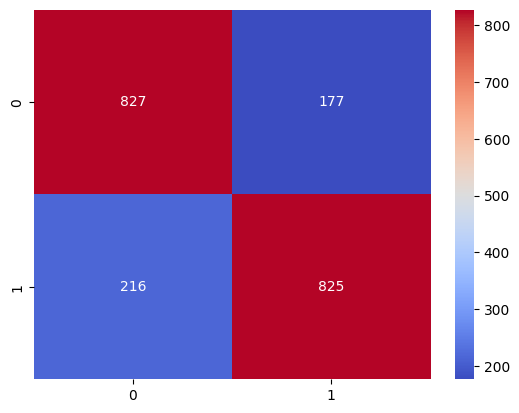

In [34]:
#Obtener las preficciones en validacion
y_pred_test= modelo_1_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

# Maquina de soporte vectorial

In [35]:
from sklearn.svm import SVC
np.random.seed(20)
modelo_2= SVC()
param_grid= {'C': [0.00001,0.0001,0.01,0.1,1,10,15,20,50],
                'kernel': ['linear', 'poly','rbf','sigmoid'],
                'degree': [2,3,4,5]}

classifier= GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1e-05, 0.0001, 0.01, 0.1, 1, 10, 15, 20, 50],
                         'degree': [2, 3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [36]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

C  degree   kernel  Accuracy
141  50.0000       5     poly  0.854119
125  20.0000       5     poly  0.845107
137  50.0000       4     poly  0.843430
109  15.0000       5     poly  0.843429
93   10.0000       5     poly  0.839240
..       ...     ...      ...       ...
20    0.0001       3   linear  0.503878
19    0.0001       2  sigmoid  0.503878
18    0.0001       2      rbf  0.503878
17    0.0001       2     poly  0.503878
16    0.0001       2   linear  0.503878

[144 rows x 4 columns]

In [37]:
modelo_2_final= classifier.best_estimator_
modelo_2_final


SVC(C=50, degree=5, kernel='poly')

SVM
              precision    recall  f1-score   support

       Alive       0.88      0.86      0.87      1004
        Dead       0.87      0.89      0.88      1041

    accuracy                           0.88      2045
   macro avg       0.88      0.88      0.88      2045
weighted avg       0.88      0.88      0.88      2045



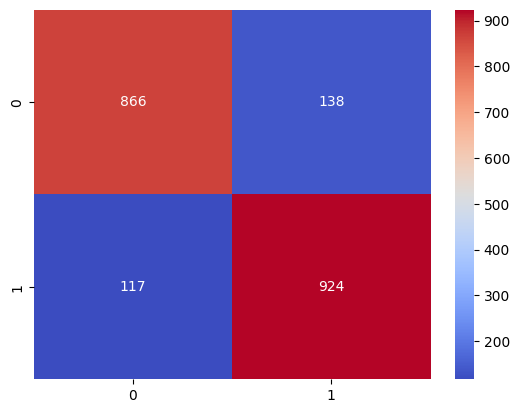

In [38]:
#Obtener las preficciones en validacion
print('SVM')
y_pred_test= modelo_2_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

In [39]:
#KMEANS
from sklearn.neighbors import KNeighborsClassifier
modelo_3= KNeighborsClassifier()
param_grid= {'n_neighbors': [3,5,7,9,11],
                'p': [1,2]}

classifier= GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2]})

In [40]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

n_neighbors  p  Accuracy
0            3  1  0.849300
1            3  2  0.848042
2            5  1  0.812829
3            5  2  0.809477
4            7  1  0.787049
5            7  2  0.783906
6            9  1  0.773635
7            9  2  0.770490
8           11  1  0.768603
9           11  2  0.767136

In [41]:
modelo_3_final= classifier.best_estimator_
modelo_3_final

KNeighborsClassifier(n_neighbors=3, p=1)

SVM
              precision    recall  f1-score   support

       Alive       0.96      0.81      0.88      1004
        Dead       0.84      0.97      0.90      1041

    accuracy                           0.89      2045
   macro avg       0.90      0.89      0.89      2045
weighted avg       0.90      0.89      0.89      2045



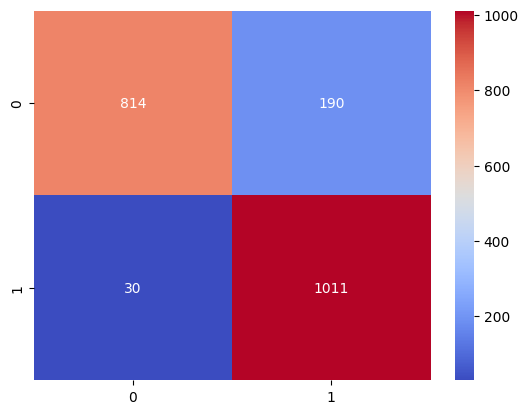

In [42]:
#Obtener las preficciones en validacion
print('SVM')
y_pred_test= modelo_3_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

# Arbol de Decision

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_graphviz,export_text
modelo_4 = DecisionTreeClassifier()
param_grid= {'criterion': ['gini', 'entropy','log_loss'],
                'max_depth': [5,15,20,10],
                'max_leaf_nodes': [None,10,12,15],
                'min_samples_split': [2,3,4,5]}

classifier= GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 15, 20, 10],
                         'max_leaf_nodes': [None, 10, 12, 15],
                         'min_samples_split': [2, 3, 4, 5]})

In [44]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

criterion  max_depth  max_leaf_nodes  min_samples_split  Accuracy
96    entropy         20             NaN                  2  0.922446
160  log_loss         20             NaN                  2  0.922028
161  log_loss         20             NaN                  3  0.919723
97    entropy         20             NaN                  3  0.918675
32       gini         20             NaN                  2  0.918672
..        ...        ...             ...                ...       ...
7        gini          5            10.0                  5  0.785579
23       gini         15            10.0                  5  0.785579
22       gini         15            10.0                  4  0.785579
21       gini         15            10.0                  3  0.785579
20       gini         15            10.0                  2  0.785579

[192 rows x 5 columns]

In [45]:
modelo_4_final= classifier.best_estimator_
modelo_4_final

DecisionTreeClassifier(criterion='entropy', max_depth=20)

Profundidad del arbol: 20
 Numero de hojas: 406


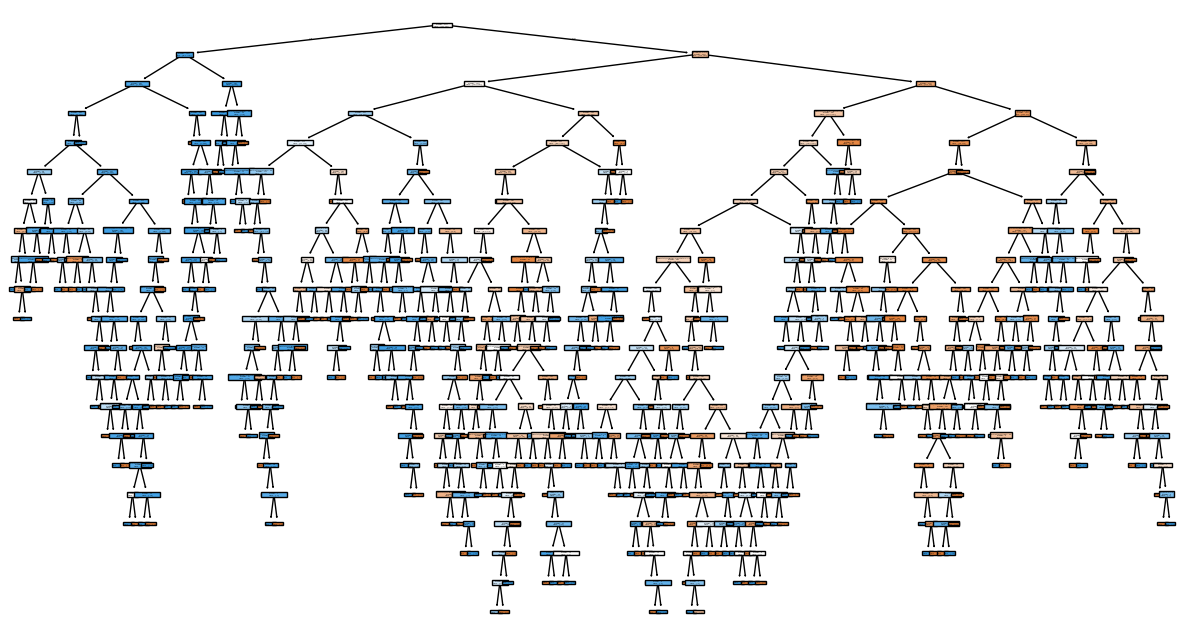

In [46]:
#grafiaco del arbol
fig, ax = plt.subplots(figsize=(15,8))
print(f'Profundidad del arbol: {modelo_4_final.get_depth()}\n Numero de hojas: {modelo_4_final.get_n_leaves()}')
plot= plot_tree(decision_tree=modelo_4_final,
                feature_names=labels,
               filled=True,
               impurity=False,
               ax=ax)




SVM
              precision    recall  f1-score   support

       Alive       0.98      0.88      0.93      1004
        Dead       0.89      0.98      0.94      1041

    accuracy                           0.93      2045
   macro avg       0.94      0.93      0.93      2045
weighted avg       0.94      0.93      0.93      2045



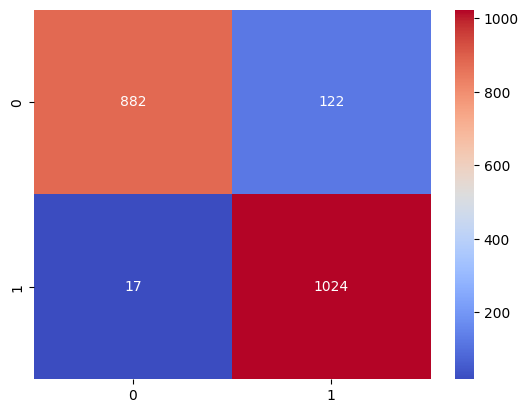

In [47]:
#Obtener las preficciones en validacion
print('SVM')
y_pred_test= modelo_4_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

## Modelos de ensamble
utilizan metodos mas simples que tienden al sobreajuste o al subajuste para mejorar la perspectiva del error

In [48]:
from sklearn.ensemble import RandomForestClassifier
modelo_5= RandomForestClassifier()
param_grid= {'n_estimators': [50,100,150,200],
                'criterion': ['gini', 'entropy', 'log_loss'],
                'max_depth': [2,3,5,7]}

In [49]:
classifier= GridSearchCV(estimator=modelo_5, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [50, 100, 150, 200]})

In [50]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

criterion  max_depth  n_estimators  Accuracy
14      gini          7           150  0.830225
13      gini          7           100  0.828758
45  log_loss          7           100  0.828129
15      gini          7           200  0.827918
12      gini          7            50  0.824985
46  log_loss          7           150  0.823517
44  log_loss          7            50  0.823309
28   entropy          7            50  0.823309
30   entropy          7           150  0.823099
31   entropy          7           200  0.822889
47  log_loss          7           200  0.821211
29   entropy          7           100  0.820793
10      gini          5           150  0.800041
9       gini          5           100  0.798364
11      gini          5           200  0.796898
8       gini          5            50  0.793754
42  log_loss          5           150  0.793754
25   entropy          5           100  0.793544
27   entropy          5           200  0.792915
41  log_loss          5           100  0.792707
26   entropy          5           150  0.792077
43  log_loss          5           200  0.791659
24   entropy          5            50  0.791658
40  log_loss          5            50  0.791450
4       gini          3            50  0.782435
7       gini          3           200  0.782226
6       gini          3           150  0.780971
36  log_loss          3            50  0.779499
39  log_loss          3           200  0.779083
1       gini          2           100  0.778035
22   entropy          3           150  0.776987
23   entropy          3           200  0.776568
21   entropy          3           100  0.775311
38  log_loss          3           150  0.775101
20   entropy          3            50  0.775099
5       gini          3           100  0.773845
3       gini          2           200  0.772585
37  log_loss          3           100  0.771957
19   entropy          2           200  0.771956
18   entropy          2           150  0.769024
34  log_loss          2           150  0.767351
17   entropy          2           100  0.766088
33  log_loss          2           100  0.765878
2       gini          2           150  0.764205
35  log_loss          2           200  0.763997
0       gini          2            50  0.759802
32  log_loss          2            50  0.759596
16   entropy          2            50  0.758755

In [51]:
modelo_5_final = classifier.best_estimator_
modelo_5_final

RandomForestClassifier(max_depth=7, n_estimators=150)

ensamble
              precision    recall  f1-score   support

       Alive       0.80      0.89      0.84      1004
        Dead       0.88      0.78      0.83      1041

    accuracy                           0.83      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.84      0.83      0.83      2045



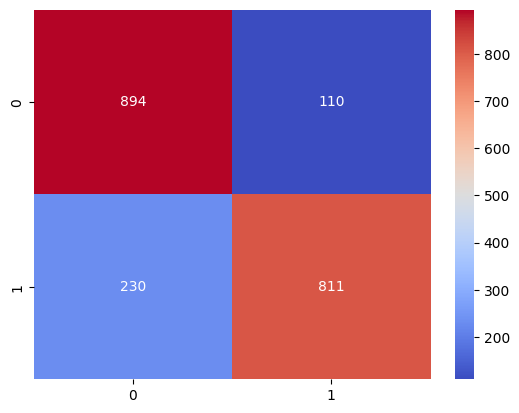

In [52]:
#Obtener las preficciones en validacion
print('ensamble')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

Ada boost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
modelo_6= AdaBoostClassifier()
param_grid= {'n_estimators': [50,100,150,200,250,300,350,400]}

In [59]:
classifier= GridSearchCV(estimator=modelo_6, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [50, 100, 150, 200, 250, 300, 350,
                                          400]})

In [60]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

n_estimators  Accuracy
4           250  0.801511
7           400  0.801302
2           150  0.801092
6           350  0.800883
5           300  0.799414
3           200  0.798996
1           100  0.797110
0            50  0.792918

In [61]:
modelo_6_final = classifier.best_estimator_
modelo_6_final

AdaBoostClassifier(n_estimators=250)

ensamble
              precision    recall  f1-score   support

       Alive       0.80      0.89      0.84      1004
        Dead       0.88      0.78      0.83      1041

    accuracy                           0.83      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.84      0.83      0.83      2045



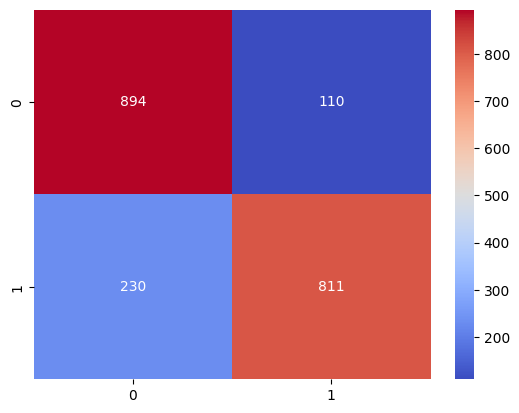

In [62]:
#Obtener las preficciones en validacion
print('ensamble')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()

Gradient boost

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_7= GradientBoostingClassifier()
param_grid= {'n_estimators': [50,100],
             'criterion': ['friedman_mse', 'squared_error'],
             'max_depth': [3,5,7]}


In [64]:
classifier= GridSearchCV(estimator=modelo_7, param_grid=param_grid, cv=5)
classifier.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100]})

In [65]:
validation=pd.concat([pd.DataFrame(classifier.cv_results_["params"]),pd.DataFrame(classifier.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)
validation.sort_values(by="Accuracy", ascending=False)

criterion  max_depth  n_estimators  Accuracy
5    friedman_mse          7           100  0.945502
11  squared_error          7           100  0.943826
4    friedman_mse          7            50  0.927479
10  squared_error          7            50  0.926431
3    friedman_mse          5           100  0.894991
9   squared_error          5           100  0.894781
2    friedman_mse          5            50  0.858102
8   squared_error          5            50  0.857683
7   squared_error          3           100  0.823730
1    friedman_mse          3           100  0.823730
0    friedman_mse          3            50  0.813039
6   squared_error          3            50  0.813039

In [66]:
modelo_7_final = classifier.best_estimator_
modelo_7_final

GradientBoostingClassifier(max_depth=7)

ensamble
              precision    recall  f1-score   support

       Alive       0.80      0.89      0.84      1004
        Dead       0.88      0.78      0.83      1041

    accuracy                           0.83      2045
   macro avg       0.84      0.83      0.83      2045
weighted avg       0.84      0.83      0.83      2045



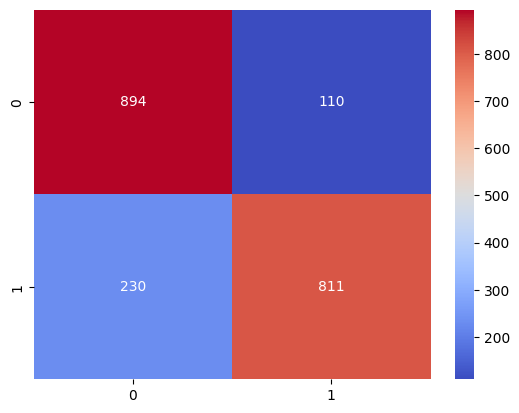

In [67]:
#Obtener las preficciones en validacion
print('ensamble')
y_pred_test= modelo_5_final.predict(X_test)
#Reporte de clasificacion
print(classification_report(y_test, y_pred_test))
#Matriz de confusion
sb.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, cmap='coolwarm', fmt='d')
plt.show()